<a href="https://colab.research.google.com/github/danacioDS/Edureka-Practices/blob/master/01_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K** **Means** **Clustering**

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [ ]:
!pip install PyDrive

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1wnJna_L0TD9mdgWnq4vszasjMjk_-HfW"})
downloaded.GetContentFile('dataset.csv')

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("dataset.csv")

In [ ]:
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [ ]:
data.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [ ]:
newdata = data.iloc[:,6:8]
newdata

,acceleration_y,acceleration_z
0,-0.7814,-0.0076
1,-1.1233,-0.2344
2,-1.4817,0.0722
3,-0.8125,0.0888
4,-0.9312,0.0359
...,...,...
88583,-0.8376,-0.1327
88584,-1.0027,-0.4397
88585,-1.1780,-0.2827
88586,-0.8582,-0.0759


In [ ]:
import seaborn as sns

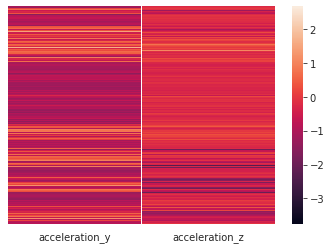

In [ ]:
sns.heatmap(newdata, yticklabels= False)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=5)

In [ ]:
kmeans.fit(newdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.cluster_centers_
print(len(kmeans.cluster_centers_))

5


In [ ]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[2 0 0 ... 0 0 0]
88588


In [ ]:
print(type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 40084, 1: 15238, 2: 21842, 3: 5419, 4: 6005}


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


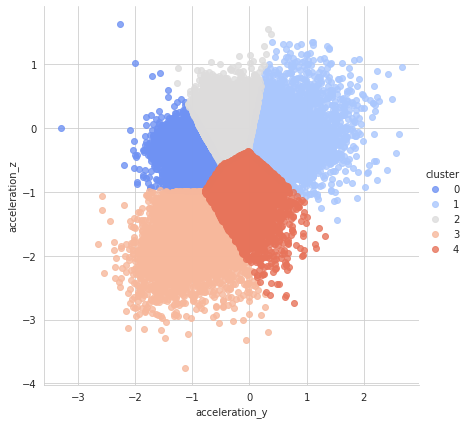

In [ ]:
# plot the data

newdata['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('acceleration_y', 'acceleration_z', data=newdata, hue='cluster', palette='coolwarm', size=6, aspect = 1, fit_reg=False)


In [ ]:
cluster0 = newdata[newdata['cluster'] == 0]

In [ ]:
cluster1 = newdata[newdata['cluster'] == 1]

In [ ]:
cluster2 = newdata[newdata['cluster'] == 2]

In [ ]:
cluster3 = newdata[newdata['cluster'] == 3]

In [ ]:
cluster4 = newdata[newdata['cluster'] == 4]

In [ ]:
lists = [cluster0, cluster1, cluster2, cluster3, cluster4]

In [ ]:
cluster0.count(), cluster0.mean(), cluster0.std()

(acceleration_y    40084
 acceleration_z    40084
 cluster           40084
 dtype: int64, acceleration_y   -1.037491
 acceleration_z   -0.262589
 cluster           0.000000
 dtype: float64, acceleration_y    0.201668
 acceleration_z    0.156414
 cluster           0.000000
 dtype: float64)